In [2]:
try:
    import pygmo as pg
except:
    !pip install pygmo
    import pygmo as pg

import numpy as np
import pandas as pd

# 1. Определение тестовых функций
class CustomRastrigin:
    def fitness(self, x):
        A = 10
        return [A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])]

    def get_bounds(self):
        return ([-5.12] * 2, [5.12] * 2) # Границы поиска

class CustomAckley:
    def fitness(self, x):
        a, b, c = 20, 0.2, 2 * np.pi
        d = len(x)
        sum1 = np.sum(x ** 2)
        sum2 = np.sum(np.cos(c * x))
        return [-a * np.exp(-b * np.sqrt(sum1 / d)) - np.exp(sum2 / d) + a + np.e]

    def get_bounds(self):
        return ([-5] * 2, [5] * 2)

# 2. Функция для оптимизации и сбора результатов
def optimize_function(problem, algorithms, n_trials=5):
    results = []
    for algo_name, algo in algorithms.items():
        algo_results = []
        for _ in range(n_trials):
            prob = pg.problem(problem)
            algo_instance = pg.algorithm(algo)
            pop = pg.population(prob, size=20)  # Начальная популяция
            pop = algo_instance.evolve(pop)
            algo_results.append(pop.champion_f[0])  # Оптимальное значение функции
        results.append((algo_name, np.mean(algo_results), np.std(algo_results)))
    return results

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 74.0 MB/s eta 0:00:00


In [3]:
# 3. Создание задач и определение алгоритмов
rastrigin = CustomRastrigin()
ackley = CustomAckley()

algorithms = {
    "DE": pg.de(gen=100),  # Differential Evolution
    "PSO": pg.pso(gen=100),  # Particle Swarm Optimization
    "Simulated Annealing": pg.simulated_annealing()
}

# 4. Оптимизация и сбор результатов
rastrigin_results = optimize_function(rastrigin, algorithms)
ackley_results = optimize_function(ackley, algorithms)

# 5. Таблица результатов
columns = ["Algorithm", "Mean Fitness", "Std Dev"]
rastrigin_df = pd.DataFrame(rastrigin_results, columns=columns)
ackley_df = pd.DataFrame(ackley_results, columns=columns)

Results for Custom Rastrigin Function:
             Algorithm  Mean Fitness   Std Dev
0                   DE      0.198992  0.397984
1                  PSO      0.000064  0.000125
2  Simulated Annealing      0.601935  0.482857

Results for Custom Ackley Function:
             Algorithm  Mean Fitness       Std Dev
0                   DE  2.632251e-07  9.248582e-08
1                  PSO  1.783981e-05  1.133607e-05
2  Simulated Annealing  1.411725e-01  1.103054e-01


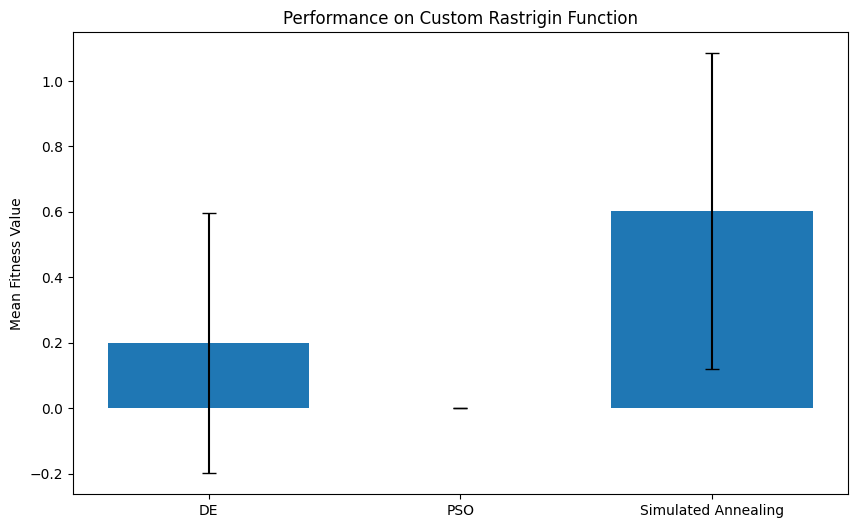

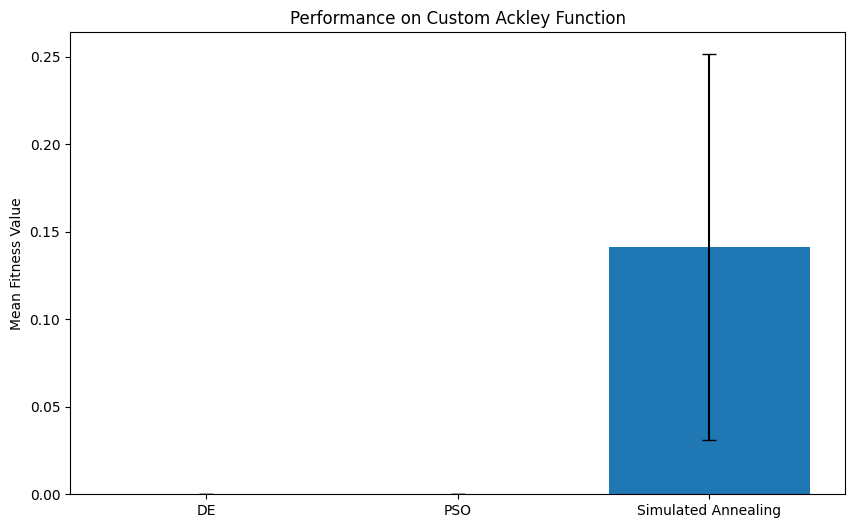

In [4]:
# 6. Вывод результатов
print("Results for Custom Rastrigin Function:")
print(rastrigin_df)
print("\nResults for Custom Ackley Function:")
print(ackley_df)

# 7. Визуализация результатов
import matplotlib.pyplot as plt

def plot_results(df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(df["Algorithm"], df["Mean Fitness"], yerr=df["Std Dev"], capsize=5)
    plt.title(title)
    plt.ylabel("Mean Fitness Value")
    plt.show()

plot_results(rastrigin_df, "Performance on Custom Rastrigin Function")
plot_results(ackley_df, "Performance on Custom Ackley Function")